In [1]:
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
from ggplot import mtcars
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

### Linear Regression Basics

In [3]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


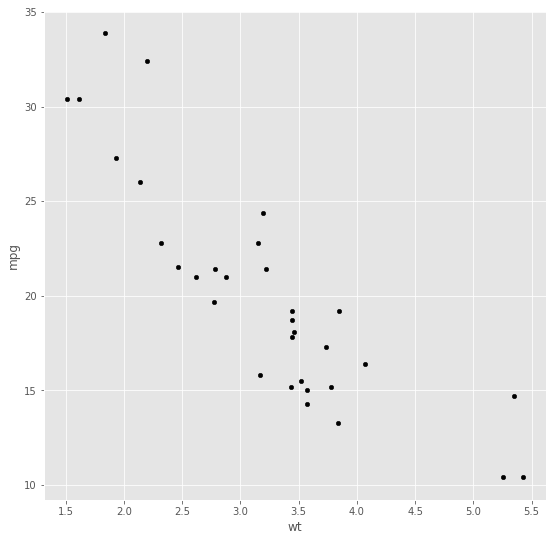

In [5]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black")

The scatterplot shows a roughly linear relationship between weight and mpg, suggesting a linear regression model might work well.

In [6]:
from sklearn import linear_model

In [7]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

37.2851261673
[-5.34447157]


The output above shows the model intercept and coefficients used to create the best fit line. In this case the y-intercept term is set to 37.2851 and the coefficient for the weight variable is -5.3445. In other words, the model fit the line mpg = 37.2851 - 5.3445*wt.

We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:

In [8]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])

0.75283279365826461

The output of the score function for linear regression is "R-squared", a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model. In this case, car weight explains roughly 75% of the variance in mpg.


The R-squared measure is based on the residuals: differences between what the model predicts for each data point and the actual value of each data point. We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:

In [9]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Actual - prediction = residuals
residuals = mtcars["mpg"] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -8.326673e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

R-squared is calculated as 1 - (SSResiduals/SSTotal) were SSResiduals is the sum of the squares of the model residuals and SSTotal is the sum of the squares of the difference between each data point and the mean of the data. We could calculate R-squared by hand like this:

In [10]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.75283279365826461

Now that we have a linear model, let's plot the line it fits on our scatterplot to get a sense of how well it fits the data:

R squared: 0.7528327936582646, Adjusted R squared: 0.7445938867802068


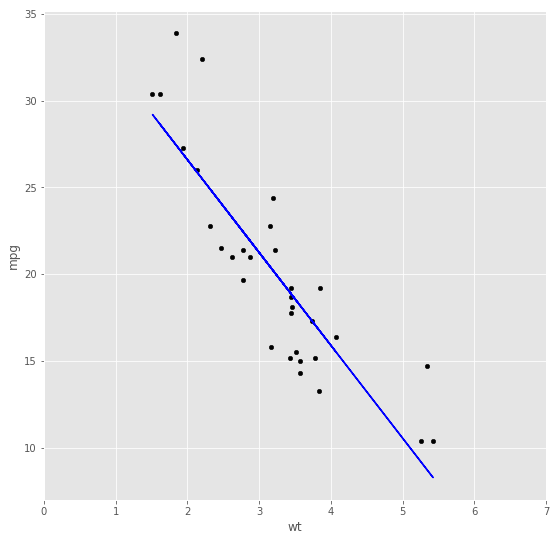

In [11]:

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue")
print ("R squared: {0}, Adjusted R squared: {1}".format(regression_model.score(X=pd.DataFrame(mtcars["wt"]), y=mtcars['mpg']),
       1 - (1-regression_model.score(X=pd.DataFrame(mtcars["wt"]), y=mtcars['mpg']))*(len(mtcars['mpg'])-1)/(len(mtcars['mpg'])-pd.DataFrame(mtcars["wt"]).shape[1]-1)))

Outliers can have a large influence on linear regression models: since regression deals with minimizing squared residuals, large residuals have a disproportionately large influence on the model. Plotting the result helps us detect influential outliers. In this case there does not appear to be any influential outliers. Let's add an outlier--a super heavy fuel efficient car--and plot a new regression model:

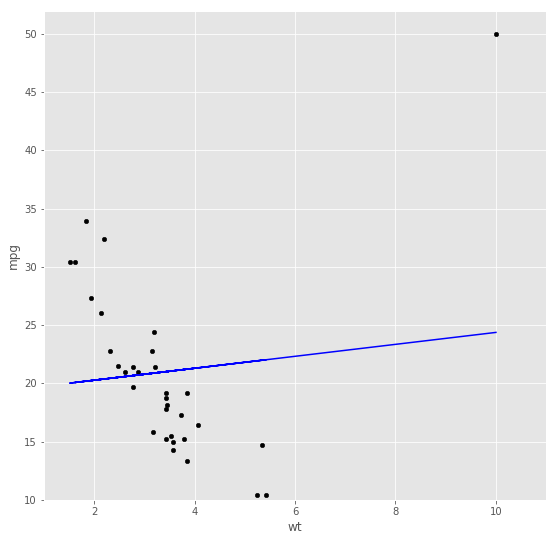

In [12]:

mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue")

In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. That is, we'd like a roughly even spread of error above and below the regression line. We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot. Make a qqplot by passing the residuals to the stats.probplot() function in the scipy.stats library:

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.0327797489458974, -8.074143041746

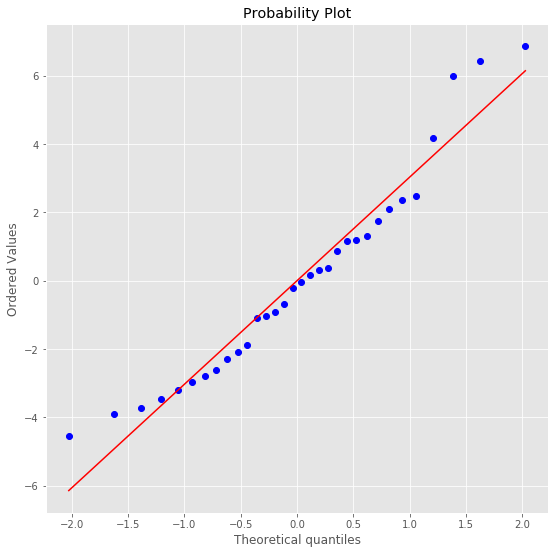

In [13]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt)

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot. In this case residuals appear to follow a slightly non-linear pattern: the residuals are bowed a bit away from the normality line on each end. This is an indication that simple straight line might not be sufficient to fully describe the relationship between weight and mpg.

Root mean squared error (RMSE) is a common evaluation metric for predictions involving real numbers. Root mean squared error is square root of the average of the squared error (residuals.). 

In [14]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.9491626859550282

### Polynomial Regression

Variables often exhibit non-linear relationships that can't be fit well with a straight line. In these cases, we can use linear regression to fit a curved line the data by adding extra higher order terms (squared, cubic, etc.) to the model. A linear regression that involves higher order terms is known as "polynomial regression."

In [15]:

# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           # Include weight
                           mtcars["wt"]**2]).T     # Include weight squared

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
poly_model.score(X = predictors, 
                 y = mtcars["mpg"])
print ("R squared: {0}, Adjusted R squared: {1}".format(poly_model.score(X=predictors, y=mtcars['mpg']),
       1 - (1-poly_model.score(X=predictors, y=mtcars['mpg']))*(len(mtcars['mpg'])-1)/(len(mtcars['mpg'])-predictors.shape[1]-1)))

Model intercept
49.9308109495
Model Coefficients
[-13.38033708   1.17108689]
R squared: 0.8190613581384095, Adjusted R squared: 0.8065828311134723


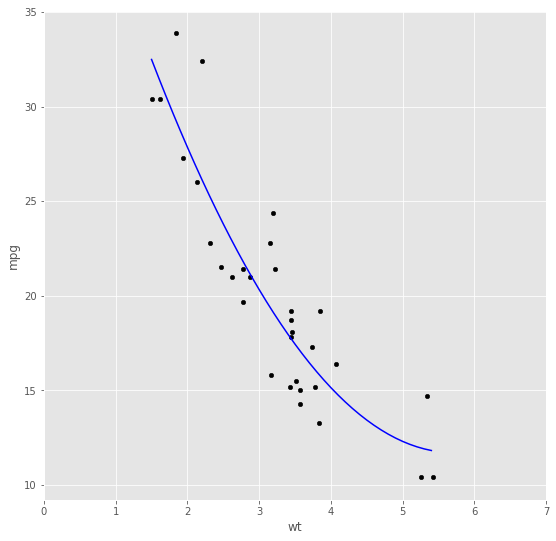

In [16]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue")

In [18]:
preds = poly_model.predict(X=predictors)

mean_squared_error(preds , mtcars["mpg"])**0.5

2.5233004724610786

Since the RMSE of the quadratic model is lower than the old one and the adjusted R-squared is higher, it is probably a better model. We do, however, have to be careful about overfitting the training data.

Overfitting describes a situation where our model fits the data we use to create it (training data) too closely, resulting in poor generalization to new data. This is why we generally don't want to use training data to evaluate a model: it gives us a biased, usually overly optimistic evaluation. One of the strengths of first and second order linear regression is that they are so simple, they are unlikely to overfit data very much. The more complex the model we create and the more freedom it has to fit the training data, the greater risk we run of overfitting. For example, we could keep including more polynomial terms in our regression model to fit the training data more closely and achieve lower RMSE scores against the training set, but this would almost certainly not generalize well to new data. Let's illustrate this point by fitting a 10th order model to the mtcars data:

In [19]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2,
                           mtcars["wt"]**3,
                           mtcars["wt"]**4,
                           mtcars["wt"]**5,
                           mtcars["wt"]**6,
                           mtcars["wt"]**7,
                           mtcars["wt"]**8,
                           mtcars["wt"]**9,
                           mtcars["wt"]**10]).T     

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept
-14921.120656
Model Coefficients
[  6.45813583e+04  -1.20086135e+05   1.26931932e+05  -8.46598480e+04
   3.73155209e+04  -1.10334758e+04   2.16590409e+03  -2.70730550e+02
   1.94974165e+01  -6.15515447e-01]


0.8702106588235019

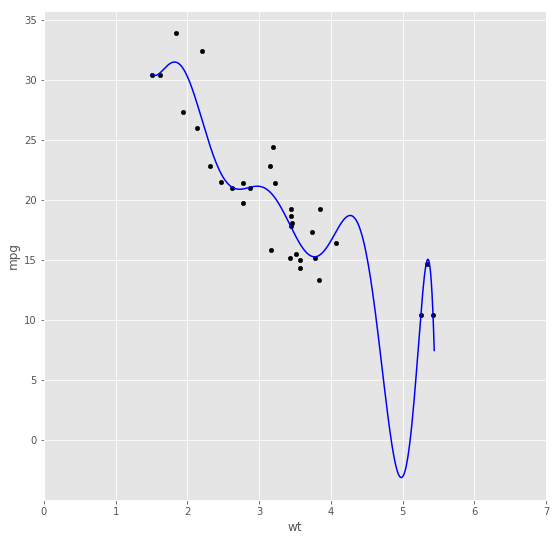

In [20]:
p_range = np.arange(1.5, 5.45, 0.01)

poly_predictors = pd.DataFrame([p_range, p_range**2, p_range**3,
                              p_range**4, p_range**5, p_range**6, p_range**7, 
                              p_range**8, p_range**9, p_range**10]).T  

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(p_range,   # X-axis range
         y_values,          # Predicted values
         color="blue")

the 10th order polynomial model curves wildly in some places to fit the training data. While this model happens to yield a closer fit to the training data, it will almost certainly fail to generalize well to new data as it leads to absurd predictions such as a car having less than 0 mpg if it weighs 5000lbs.

### Multiple Linear Regression


In [21]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Train the model using the mtcars data
multi_reg_model.fit(X = mtcars.ix[:,["wt","hp"]], 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(multi_reg_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print(multi_reg_model.coef_)

# Check R-squared
multi_reg_model.score(X = mtcars.ix[:,["wt","hp"]], 
                      y = mtcars["mpg"])

37.2272701164
[-3.87783074 -0.03177295]


0.8267854518827914

The improved R-squared score suggests horsepower has a linear relationship with mpg. Let's investigate with a plot:

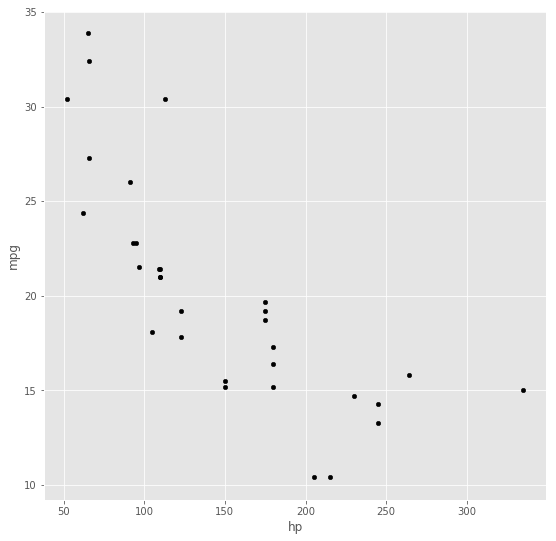

In [22]:
mtcars.plot(kind="scatter",
           x="hp",
           y="mpg",
           figsize=(9,9),
           color="black")

While mpg does tend to decline with horsepower, the relationship appears more curved than linear so adding polynomial terms to our multiple regression model could yield a better fit:

In [25]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Include squared terms
poly_predictors = pd.DataFrame([mtcars["wt"],
                                mtcars["hp"],
                                mtcars["wt"]**2,
                                mtcars["hp"]**2]).T

# Train the model using the mtcars data
multi_reg_model.fit(X = poly_predictors, 
                    y = mtcars["mpg"])

# Check R-squared
print("R-Squared")
print( multi_reg_model.score(X = poly_predictors , 
                      y = mtcars["mpg"]) )

# Check RMSE
print("RMSE")
print(mean_squared_error(multi_reg_model.predict(poly_predictors),mtcars["mpg"])**0.5)

R-Squared
0.890727954967
RMSE
1.96091081342


The new R-squared and lower RMSE suggest this is a better model than any we made previously and we wouldn't be too concerned about overfitting since it only includes 2 variables and 2 squared terms. 